# Benjamin Freund

# Week 6 Assignment

For this week's assignment, I will be analyzing a dataset that describes various attributes of about 54,000 diamonds. The code below imports the Pandas and Numpy packages into the Python environment, and it reads and displays the diamonds dataset.

In [6]:
# Importing Pandas and Numpy into the Python environment
import pandas as pd
import numpy as np

# Assigning the diamonds.csv path to filename
filename = "/Users/benjaminfreund/Desktop/YU/Graduate/Data Acquisition & Mangement/diamonds.csv"

# Reading the filename csv into the Pandas dataframe diamonds
diamonds = pd.read_csv(filename)

# Displaying diamonds
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Question 1

The first question asks for the proportion of diamonds that are between 0.30 and 1.08 carats. To calculate this, I indexed all the diamonds that had a carat value that was both greater than or equal to 0.30 and less than or equal to 1.08. Then, I calculated the length of this dataframe to determine how many diamonds fell under the aforementioned criteria. Next, I divided the length of the overall diamonds dataframe by this new calculated length and multiplied that number by 100 to get the proportion as a percentage. Finally, I rounded this number to 2 decimal points, in order to make the proportion percentage more readable.

In [18]:
# Calculating the proportion of diamonds that are between 0.30 and 1.08 carats and storing it in proportion
proportion = round(((len(diamonds[(diamonds.carat >= 0.30) & (diamonds.carat <= 1.08)]) / len(diamonds)) * 100), 2)

# Printing proportion in sentence form
print(proportion, '% of diamonds are between 0.30 and 1.08 carats.')

74.68 % of diamonds are between 0.30 and 1.08 carats.


## Question 2

This question asked for the number of diamonds with an equal length and width. To accomplish this, I indexed all of the diamonds that had an equal length and width, and then I got the length of the diamonds that fit those criteria.

In [35]:
# Calculating the number of diamonds with equal x and y dimensions and storing it in equal
equal = len(diamonds[diamonds.x == diamonds.y])

# Printing equal in sentence form
print(equal, 'diamonds have equal x and y dimensions.')

17 diamonds have equal x and y dimensions.


## Question 3

This question asked for the number of diamonds with a carat value lower than the mean carat value. To calculate this, I used Pandas' describe function to calculate the mean of the carat column. Then, I indexed all diamonds which have a smaller carat value than the calculated mean carat value. Finally, I got the length of the diamonds that fit the aforementioned criteria.

In [34]:
# Calculating the number of diamonds that have a carat value less than the mean carat value and storing it in less
less = len(diamonds[(diamonds['carat']) < (diamonds['carat'].describe()['mean'])])

# Printing less in sentence form
print(less, 'diamonds have a carat value less than the mean carat value.')

31127 diamonds have a carat value less than the mean carat value.


## Question 4

This question asked me to determine how many diamonds have a Premium cut or better. I was told that the only cut better than Premium is Ideal, so I only looked for those diamonds with a cut that is Premium or Ideal. To do this, I indexed all diamonds with either of those two cuts, and then I got the length of the diamonds that fit the aforementioned criteria.

In [38]:
# Calculating the number of diamonds that have a cut which is Premium or better and storing it in cut
cut = len(diamonds[(diamonds.cut == 'Premium') | (diamonds.cut == 'Ideal')])

# Printing cut in sentence form
print(cut, 'diamonds have a Premium cut or better.')

35342 diamonds have a Premium cut or better.


## Question 5

This question wanted me to locate the highest price per carat and the value of that diamond. To do this, I first created a new column called price_per_carat, which was simply the carat value of each diamond divided by its price. I then added that column to the diamonds dataframe. Next, I used the describe function to locate the diamond with the highest price per carat, and I printed all of the information about that diamond.

In [76]:
# Calculating the price per carat and storing it in price_per_carat
price_per_carat = diamonds.price/diamonds.carat

# Adding the Price_Per_Carat column onto the original diamonds dataframe
diamonds['Price_Per_Carat'] = price_per_carat

# Printing all of the information about the diamond with the maximum price per carat
print(diamonds[(diamonds.Price_Per_Carat) == (diamonds['Price_Per_Carat'].describe()['max'])])

# Printing a blank line for readability
print('')

# Printing an explanation about the diamond with the maximum price per carat
print('As can be seen above, diamond #27635 has the highest price per carat. It has a carat value of 1.04, a price of $18,542, and a rounded price per carat of $17,828.85')

       carat        cut color clarity  depth  table  price     x     y     z  \
27635   1.04  Very Good     D      IF   61.3   56.0  18542  6.53  6.55  4.01   

       Price_Per_Carat  
27635     17828.846154  

As can be seen above, diamond #27635 has the highest price per carat. It has a carat value of 1.04, a price of $18,542, and a rounded price per carat of $17,828.85


## Question 6

This queston asked me to make a bar plot of the cut data. To do this, I used Pandas' plot.bar function. The value_counts() function calculates the frequency and displays it on the bar graph.

The below bar plot displays that as the cut becomes of a lower quality, it becomes less frequent.


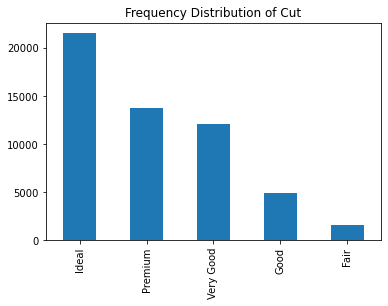

In [91]:
# Creating the bar plot for the frequency distribution of the cut and storing it in bar_plot
bar_plot = diamonds['cut'].value_counts().plot.bar(title = 'Frequency Distribution of Cut')

# Displaying bar_plot
bar_plot

# Printing an analysis of the bar plot
print('The below bar plot displays that as the cut becomes of a lower quality, it becomes less frequent.')

## Question 7

This question asked me to create boxplots of the diamond price by each cut. To do this, I used Pandas' boxplot function. The "column" specifies which column in the dataframe Pandas should make the boxplot out of, and the "by" specifies how Pandas should group the boxplots.

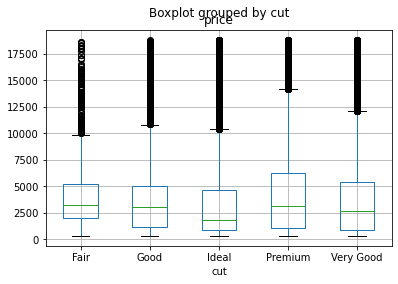

In [77]:
# Creating boxplots of price grouped by cut and storing them in box_plot
box_plot = diamonds.boxplot(column = 'price', by = 'cut')

# Displaying box_plot
box_plot

From the above boxplots, one can make a very interesting observation. As the quality of the cut increases from Fair to Premium, the maximum price increases as well. However, once one gets to the highest quality cut (Ideal), the maximum price drops. Similarly, the price at the minimum, first quartile, median, and third quartile are all lower by the Ideal cut than by any other cut. This indicates that diamonds with an Ideal cut may be priced lower than their counterparts.

## Question 8

This question asked me to create histograms of the length ("x" in the dataset), width ("y" in the dataset), depth ("z" in the dataset), and total depth ("depth" in the dataset). To do this, I used the hist function found in Pandas. The "column" specifies which column Pandas should use to create the histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2c3375310>]],
      dtype=object)

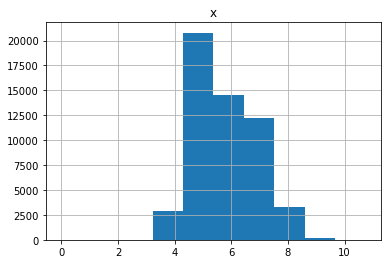

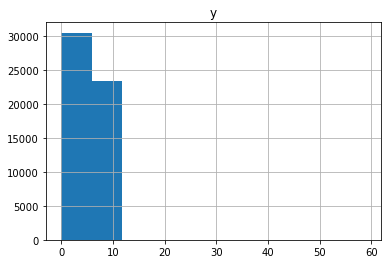

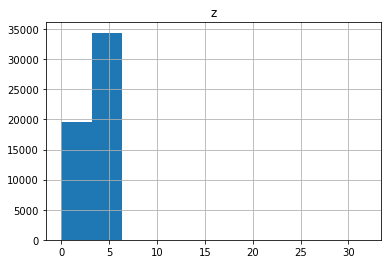

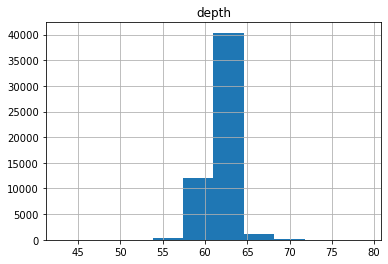

In [90]:
# Creating a histogram of the length
diamonds.hist(column = 'x')

# Creating a histogram of the width
diamonds.hist(column = 'y')

# Creating a histogram of the depth
diamonds.hist(column = 'z')

# Creating a histogram of the total depth
diamonds.hist(column = 'depth')

Most diamonds have a length between roughly 4 and 5 mm. Given that the range set forth in the data dictionary is 0 - 10.74 mm, this range seems to be roughly in the middle.

Most diamonds have a width between roughly 0 and 5 mm. Given that the range set forth in the data dictionary is 0 - 58.9 mm, this range seems to show that these diamonds tend to be more narrow.

Most diamonds have a depth between roughly 3 and 6 mm. Given that the range set forth in the data dictionary is 0 - 31.8 mm, this range seems to show that these diamonds don't have a large depth.

Most diamonds have a total depth between roughly 61 and 64 mm. Given that the range set forth in the data dictionary is 43 - 79 mm, this range seems to be roughly in the middle.

## Question 9

This question asked me to create a scatter plot of price vs. carat. To do this, I used Pandas' plot.scatter function and specified the columns to be the price and carat columns found in the dataset.

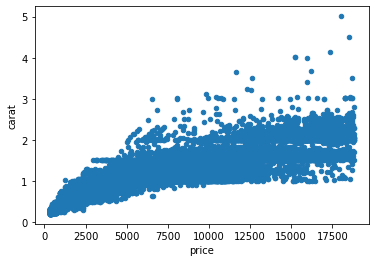

In [88]:
# Creating a scatterplot of price vs. carat
diamonds.plot.scatter('price', 'carat')

The scatterplot above seems to indicate a positive relationship between price and carat. Meaning to say, as the price goes up, the amount of carats will generally go up as well. However, this does not indicate causation, just some form of correlation. Additionally, this is not a perfect correlation. Furthermore, as one looks at the plot, there appears to be some outliers, or situations where there are many more carats, yet the price remains the same as if there were less carats. Further investigation should be done as to the nature of those seeming outliers.